In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
import plotly
plotly.__version__

'1.12.6'

In [7]:
import plotly.plotly as py
import plotly.graph_objs as go

In [8]:
import numpy as np
import scipy.stats as st
import scipy.interpolate as si
import pandas as pd
import seaborn as sns

import os
import sys
import itertools

In [9]:
%load_ext watermark

In [10]:
%watermark -a "David Avakian" -d -v -m -p numpy,scipy,pandas,seaborn -g

David Avakian 2016-08-15 

CPython 3.5.2
IPython 4.1.2

numpy 1.10.4
scipy 0.17.0
pandas 0.18.0
seaborn 0.7.0

compiler   : GCC 4.4.7 20120313 (Red Hat 4.4.7-1)
system     : Linux
release    : 3.13.0-85-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit
Git hash   : 22d42fb0821d08f0ba9a2328e9856eedd8840c1e


### Sierpinski Cube

Start with a cube, on iteration:
- divide into 3 x 3 x 3 sub-cubes
- recurse on sub-cubes where # of 2 indexes < 2

In [241]:
def sierp_cube_iter(x0, x1, y0, y1, z0, z1, cur_depth, max_depth=3, n_pts=10, cur_index=0):
    
    if cur_depth >= max_depth:
        
        x = np.linspace(x0, x1, n_pts)
        y = np.linspace(y0, y1, n_pts)
        z = np.linspace(z0, z1, n_pts)
        
        xx, yy, zz = np.meshgrid(x, y, z)
        rr = np.ones(shape=xx.shape) * np.cos(xx * 5) * np.cos(yy * 5) * np.cos(zz * 5)
        ii = np.ones(shape=xx.shape) * cur_index
        
        df_res = pd.DataFrame({'x': xx.flatten(),
                               'y': yy.flatten(),
                               'z': zz.flatten(),
                               'r': rr.flatten(),
                               'i': ii.flatten()})
    
    else:
        
        dx = (x1 - x0) / 3
        dy = (y1 - y0) / 3
        dz = (z1 - z0) / 3
        
        i_sub = 0
        df_res = None
        
        for ix in range(3):
            for iy in range(3):
                for iz in range(3):
                    if int(ix == 1) + int(iy == 1) + int(iz == 1) >= 2:
                        continue
                        
                    print('\t' * cur_depth, ': #', i_sub + 1, '-', ix, iy, iz)
                    df_sub = sierp_cube_iter(x0 + ix * dx,
                                             x0 + (ix + 1) * dx,
                                             y0 + iy * dy,
                                             y0 + (iy + 1) * dy,
                                             z0 + iz * dz,
                                             z0 + (iz + 1) * dz,
                                             cur_depth + 1,
                                             max_depth=max_depth,
                                             n_pts=n_pts,
                                             cur_index=cur_index * 20 + i_sub)
                    i_sub += 1
                    
                    if df_res is None:
                        df_res = df_sub
                    else:
                        df_res = pd.concat([df_res, df_sub], axis=0)
                    
    return df_res
        
        

In [242]:
df_sierp = sierp_cube_iter(0, 1, 0, 1, 0, 1, 0, max_depth=2, n_pts=10)

 : # 1 - 0 0 0
	 : # 1 - 0 0 0
	 : # 2 - 0 0 1
	 : # 3 - 0 0 2
	 : # 4 - 0 1 0
	 : # 5 - 0 1 2
	 : # 6 - 0 2 0
	 : # 7 - 0 2 1
	 : # 8 - 0 2 2
	 : # 9 - 1 0 0
	 : # 10 - 1 0 2
	 : # 11 - 1 2 0
	 : # 12 - 1 2 2
	 : # 13 - 2 0 0
	 : # 14 - 2 0 1
	 : # 15 - 2 0 2
	 : # 16 - 2 1 0
	 : # 17 - 2 1 2
	 : # 18 - 2 2 0
	 : # 19 - 2 2 1
	 : # 20 - 2 2 2
 : # 2 - 0 0 1
	 : # 1 - 0 0 0
	 : # 2 - 0 0 1
	 : # 3 - 0 0 2
	 : # 4 - 0 1 0
	 : # 5 - 0 1 2
	 : # 6 - 0 2 0
	 : # 7 - 0 2 1
	 : # 8 - 0 2 2
	 : # 9 - 1 0 0
	 : # 10 - 1 0 2
	 : # 11 - 1 2 0
	 : # 12 - 1 2 2
	 : # 13 - 2 0 0
	 : # 14 - 2 0 1
	 : # 15 - 2 0 2
	 : # 16 - 2 1 0
	 : # 17 - 2 1 2
	 : # 18 - 2 2 0
	 : # 19 - 2 2 1
	 : # 20 - 2 2 2
 : # 3 - 0 0 2
	 : # 1 - 0 0 0
	 : # 2 - 0 0 1
	 : # 3 - 0 0 2
	 : # 4 - 0 1 0
	 : # 5 - 0 1 2
	 : # 6 - 0 2 0
	 : # 7 - 0 2 1
	 : # 8 - 0 2 2
	 : # 9 - 1 0 0
	 : # 10 - 1 0 2
	 : # 11 - 1 2 0
	 : # 12 - 1 2 2
	 : # 13 - 2 0 0
	 : # 14 - 2 0 1
	 : # 15 - 2 0 2
	 : # 16 - 2 1 0
	 : # 17 - 2 1 2
	 : # 18 - 2 

In [243]:
len(df_sierp)

400000

In [244]:
df_sierp.describe()

,i,r,x,y,z
count,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000
mean,199.500000,-0.001712,0.500000,0.500000,0.500000
std,115.469837,0.306767,0.316264,0.316264,0.316264
min,0.000000,-0.999979,0.000000,0.000000,0.000000
25%,99.750000,-0.090442,0.222222,0.222222,0.222222
50%,199.500000,-0.000556,0.500000,0.500000,0.500000
75%,299.250000,0.086691,0.777778,0.777778,0.777778
max,399.000000,1.000000,1.000000,1.000000,1.000000


In [245]:
df_cut = df_sierp[df_sierp.z == 0.0]
df_cut.describe()

,i,r,x,y,z
count,6400.000000,6400.000000,6400.000000,6400.000000,6400.0
mean,183.750000,-0.021149,0.500000,0.500000,0.0
std,110.486854,0.460245,0.306373,0.306373,0.0
min,0.000000,-0.999979,0.000000,0.000000,0.0
25%,94.250000,-0.266934,0.234568,0.234568,0.0
50%,188.500000,-0.015643,0.500000,0.500000,0.0
75%,267.750000,0.217915,0.765432,0.765432,0.0
max,357.000000,1.000000,1.000000,1.000000,0.0


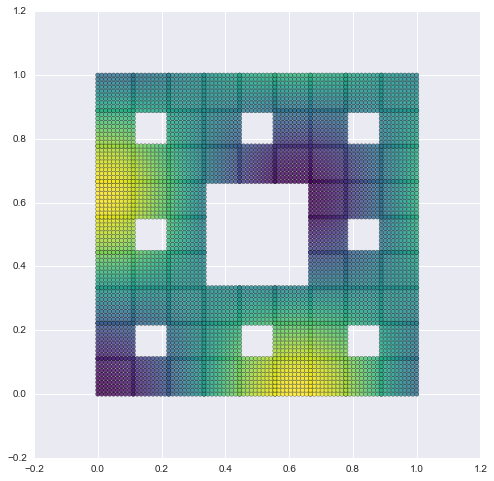

In [246]:
figure(figsize=(8, 8))
scatter(x=df_cut.x, y=df_cut.y, c=df_cut.r, marker='o',
        cmap='viridis_r', alpha=0.8)

In [281]:
# colorscales
# 'pairs' | 'Greys' | 'Greens' | 'Bluered' | 'Hot' | 'Picnic' | 'Portland' | 'Jet' | 'RdBu' |
# 'Blackbody' | 'Earth' | 'Electric' | 'YIOrRd' | 'YIGnBu'

In [433]:
data = []
i_side = 0

for cond in [(df_sierp.x == df_sierp.x.min()), (df_sierp.x == df_sierp.x.max()),
             (df_sierp.y == df_sierp.y.min()), (df_sierp.y == df_sierp.y.max()),
             (df_sierp.z == df_sierp.z.min()), (df_sierp.z == df_sierp.z.max())]:
    
    df_sierp_plot = df_sierp[cond]
    print(df_sierp_plot.shape)
    
    trace = go.Scatter3d(
        x=df_sierp_plot.x,
        y=df_sierp_plot.y,
        z=df_sierp_plot.z,
        mode='markers',
        marker=dict(
            size=2,
            color=df_sierp_plot.r,
            colorscale='Hot',
            opacity=1.0
        ),
        name='Side %d' % (i_side + 1),
        visible=True
    )
    data.append(trace)
    
    i_side += 1
    

(6400, 5)
(6400, 5)
(6400, 5)
(6400, 5)
(6400, 5)
(6400, 5)


In [434]:
layout = go.Layout(
    autosize=True,
    width=800,
    height=600,
    title='Sierpinski Cube Surface (d=2) - Point Cloud Plot',
)

fig = go.Figure(data=data, layout=layout)

In [435]:
py.iplot(fig, filename='3d-sierpinski-cube-pt-cloud')

### Save the data

In [282]:
df_sierp.to_csv('sierp_cube.csv')

### Get a mesh representation of the cube

In [414]:
def sierp_cube_mesh_iter(x0, x1, y0, y1, z0, z1, cur_depth, max_depth=3, cur_index=0):
    
    if cur_depth >= max_depth:
        
        x = [x0, x0, x1, x1, x0, x0, x1, x1]
        y = [y0, y1, y1, y0, y0, y1, y1, y0]
        z = [z0, z0, z0, z0, z1, z1, z1, z1]
        i = [7, 0, 0, 0, 4, 4, 6, 6, 4, 0, 3, 2]
        j = [3, 4, 1, 2, 5, 6, 5, 2, 0, 1, 6, 3]
        k = [0, 7, 2, 3, 6, 7, 1, 1, 5, 5, 7, 6]
        r = [2 * cur_index * cos(x[i] + y[i] + z[i]) for i in range(len(x))]
        
        return (x, y, z, i, j, k, r, len(x))
    
    else:
        
        x = []
        y = []
        z = []
        i = []
        j = []
        k = []
        r = []
        n = 0
        
        dx = (x1 - x0) / 3
        dy = (y1 - y0) / 3
        dz = (z1 - z0) / 3
        
        i_sub = 0
        df_res = None
        
        for ix in range(3):
            for iy in range(3):
                for iz in range(3):
                    if int(ix == 1) + int(iy == 1) + int(iz == 1) >= 2:
                        continue
                        
                    print('\t' * cur_depth, ': #', i_sub + 1, '-', ix, iy, iz)
                    (sub_x, sub_y, sub_z, sub_i, sub_j, sub_k, sub_r, sub_n) = \
                            sierp_cube_mesh_iter(x0 + ix * dx,
                                                 x0 + (ix + 1) * dx,
                                                 y0 + iy * dy,
                                                 y0 + (iy + 1) * dy,
                                                 z0 + iz * dz,
                                                 z0 + (iz + 1) * dz,
                                                 cur_depth + 1,
                                                 max_depth=max_depth,
                                                 cur_index=cur_index * 20 + i_sub)
                    i_sub += 1

                    i += [n + _i for _i in sub_i]
                    j += [n + _j for _j in sub_j]
                    k += [n + _k for _k in sub_k]

                    x += sub_x
                    y += sub_y
                    z += sub_z
                    r += sub_r
                    
                    n += sub_n
                    
        return (x, y, z, i, j, k, r, n)
        
        

In [427]:
def sierp_cube_mesh(x0, x1, y0, y1, z0, z1, max_depth=3):
    
    (x, y, z, i, j, k, r, n) = sierp_cube_mesh_iter(x0, x1, y0, y1, z0, z1, 0, max_depth=max_depth)
    
    mesh = go.Mesh3d(
        x = x,
        y = y,
        z = z,
        colorscale = 'Greens',
        intensity = r,
        i = i,
        j = j,
        k = k,
        name='Sierpinski Cube (d=%d)' % max_depth,
        showscale=True,
        lighting=dict(ambient=0.99, roughness=0.99, diffuse=0.99)
    )
    
    data = [mesh]
    layout = go.Layout(
        autosize=True,
        width=800,
        height=600,
        title='Sierpinski Cube (d=%d) - Mesh Plot' % max_depth,
    )

    fig = go.Figure(data=data, layout=layout)
    return fig

In [439]:
fig = sierp_cube_mesh(0, 1, 0, 1, 0, 1, max_depth=3)

 : # 1 - 0 0 0
	 : # 1 - 0 0 0
		 : # 1 - 0 0 0
		 : # 2 - 0 0 1
		 : # 3 - 0 0 2
		 : # 4 - 0 1 0
		 : # 5 - 0 1 2
		 : # 6 - 0 2 0
		 : # 7 - 0 2 1
		 : # 8 - 0 2 2
		 : # 9 - 1 0 0
		 : # 10 - 1 0 2
		 : # 11 - 1 2 0
		 : # 12 - 1 2 2
		 : # 13 - 2 0 0
		 : # 14 - 2 0 1
		 : # 15 - 2 0 2
		 : # 16 - 2 1 0
		 : # 17 - 2 1 2
		 : # 18 - 2 2 0
		 : # 19 - 2 2 1
		 : # 20 - 2 2 2
	 : # 2 - 0 0 1
		 : # 1 - 0 0 0
		 : # 2 - 0 0 1
		 : # 3 - 0 0 2
		 : # 4 - 0 1 0
		 : # 5 - 0 1 2
		 : # 6 - 0 2 0
		 : # 7 - 0 2 1
		 : # 8 - 0 2 2
		 : # 9 - 1 0 0
		 : # 10 - 1 0 2
		 : # 11 - 1 2 0
		 : # 12 - 1 2 2
		 : # 13 - 2 0 0
		 : # 14 - 2 0 1
		 : # 15 - 2 0 2
		 : # 16 - 2 1 0
		 : # 17 - 2 1 2
		 : # 18 - 2 2 0
		 : # 19 - 2 2 1
		 : # 20 - 2 2 2
	 : # 3 - 0 0 2
		 : # 1 - 0 0 0
		 : # 2 - 0 0 1
		 : # 3 - 0 0 2
		 : # 4 - 0 1 0
		 : # 5 - 0 1 2
		 : # 6 - 0 2 0
		 : # 7 - 0 2 1
		 : # 8 - 0 2 2
		 : # 9 - 1 0 0
		 : # 10 - 1 0 2
		 : # 11 - 1 2 0
		 : # 12 - 1 2 2
		 : # 13 - 2 0 0
		 : # 14 

In [440]:
py.iplot(fig, filename='3d-sierpinski-cube-mesh')

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.

